# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objectives

At the end of the experiment,  you will be able to :

* Understand how to derive Eigen faces using PCA
* Use the PCA features for classification purpose.

In [0]:
#@title Experiment Walkthrough
#@markdown PCA With EigenFaces
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details_backup/pca_with_eigen_faces.mp4" type="video/mp4">
</video>""")



## Dataset

### Description 

The dataset choosen for this experiment is a preprocessed excerpt of the “Labeled Faces in the Wild”, aka LFW. 

Labeled Faces in the Wild, a database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. The only constraint on these faces is that they were detected by the Viola-Jones face detector. 

## AI / ML Technique

### Eigen Faces

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

### Setup Steps

In [0]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2001337" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9003201490" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="008_PCAwithEigenFaces_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install imageio")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return


def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getInclassSupport() and getOnlineSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Inclass_support,
              "feedback_online_mentor" : Online_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  
def getInclassSupport():
  try:
    if not Inclass_support:
      raise NameError
    else:
      return Inclass_support
  except NameError:
    print ("Please answer Inclass support Question")
    return None
  
  
def getOnlineSupport():
  try:
    if not Online_support:
      raise NameError
    else:
      return Online_support
  except NameError:
    print ("Please answer Online support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Importing Required Packages

In [0]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt
# Importing Sklearn Packages
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [0]:
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



Automatically created module for IPython interactive environment


## Download the data

In [0]:
# Loading and Downloading data from sklearn 
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Storing images arrays shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

2020-02-23 06:49:33,107 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2020-02-23 06:49:34,087 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2020-02-23 06:49:35,043 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2020-02-23 06:49:36,214 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


In [0]:
type(lfw_people)

sklearn.utils.Bunch

In [0]:
lfw_people.data.shape, lfw_people.images.shape

((1288, 1850), (1288, 50, 37))

### Assigning to the X i.e. data variable, by using the 'data' attribute present within lfw_people

In [0]:
X = lfw_people.data
n_features = X.shape[1]

In [0]:
len(lfw_people.target), len(lfw_people.target_names)

(1288, 7)

In [0]:
lfw_people.target[:1], lfw_people.target_names

(array([5]),
 array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17'))

In [0]:

# the label to predict is the id of the person
y = lfw_people.target
# Loading the target names (Label names)
target_names = lfw_people.target_names
# Checkinq How many classes are present
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)




Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


### Split into a training and testing set using train_test_split sklearn function


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Performing PCA on the face images, otherwise known as Eigenfaces

### Compute the PCA

In [0]:
###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
# Starting the timer
t0 = time()

# Trying to extarct PCA features using PCA function from sklearn
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# Printing the time taken to extract the features
print("done in %0.3fs" % (time() - t0))

# Storing the eigen faces
eigenfaces = pca.components_.reshape((n_components, h, w))


Extracting the top 150 eigenfaces from 966 faces
done in 0.267s


In [0]:
print (eigenfaces[0])

[[-0.00766048 -0.00811348 -0.00905381 ... -0.01304767 -0.0115261
  -0.0111744 ]
 [-0.00750966 -0.0084609  -0.00987256 ... -0.01376386 -0.01210641
  -0.01182548]
 [-0.00819996 -0.00925795 -0.0108986  ... -0.01483773 -0.01294636
  -0.01258943]
 ...
 [-0.00043414 -0.00141411 -0.00475521 ... -0.01848291 -0.01537495
  -0.0133372 ]
 [-0.00093703 -0.00165704 -0.00459709 ... -0.01819319 -0.01488758
  -0.01247771]
 [-0.00190906 -0.00252776 -0.00430977 ... -0.01638328 -0.01435877
  -0.01204144]]


In [0]:
len (eigenfaces[0])

50

### Projecting the input data on the eigenfaces orthonormal basis


In [0]:
t0 = time()
# Transforming the data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.034s


In [0]:
# Checking for the shape of the original data 
X_train.shape, X_train_pca.shape, X_test.shape, X_test_pca.shape

((966, 1850), (966, 150), (322, 1850), (322, 150))

## Train a MLP classification model


### Fitting the classifier to the training set

In [0]:
t0 = time()
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,30,30))


In [0]:
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

done in 3.648s


###  Quantitative evaluation of the model quality on the test set

In [0]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)

from sklearn.metrics import accuracy_score

print("done in %0.3fs" % (time() - t0))

print("accuracy is", accuracy_score(y_test,y_pred,normalize=True))
print("classification report")
print(classification_report(y_test, y_pred, target_names=target_names))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Predicting people's names on the test set
done in 0.010s
accuracy is 0.7484472049689441
classification report
                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.55      0.61        20
     Colin Powell       0.77      0.81      0.79        58
  Donald Rumsfeld       0.65      0.48      0.56        31
    George W Bush       0.78      0.88      0.83       141
Gerhard Schroeder       0.64      0.52      0.57        27
      Hugo Chavez       0.69      0.73      0.71        15
       Tony Blair       0.76      0.63      0.69        30

         accuracy                           0.75       322
        macro avg       0.71      0.66      0.68       322
     weighted avg       0.74      0.75      0.74       322

confusion matrix
[[ 11   2   2   5   0   0   0]
 [  2  47   0   7   0   0   2]
 [  1   2  15  11   0   0   2]
 [  0   7   3 124   3   2   2]
 [  2   2   2   5  14   2   0]
 [  0   0   1   3   0  11   0]
 [  0   1   0   4   5   1  19]]


### Qualitative evaluation of the predictions using matplotlib


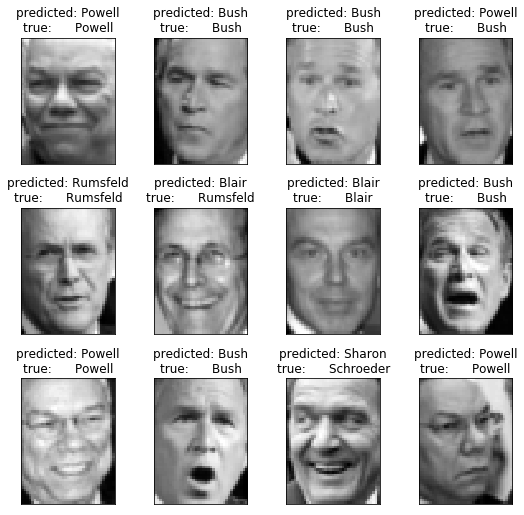

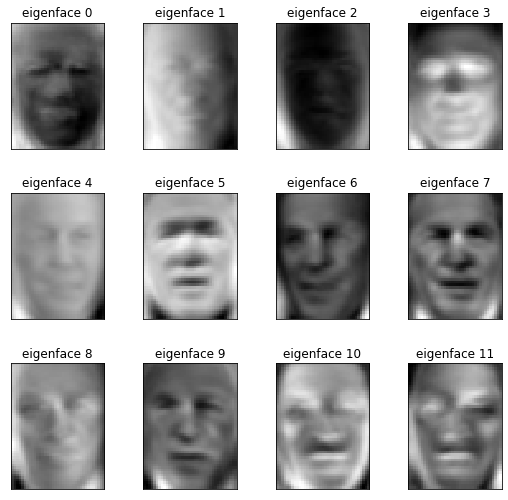

In [0]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

#### Please answer the questions below to complete the experiment:

In [0]:
#@title The dataset LFW, contains a set of EigenFaces which we use to train our Machine Learning model?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE", "FALSE"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Was Tough, but I did it" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [0]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [0]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [0]:
#@title In class Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Inclass_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [0]:
#@title Online Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Online_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1960
Date of submission:  23 Feb 2020
Time of submission:  12:50:50
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
